# Laboratorio 2

## Importación de librerías y carga de dataset

In [462]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [463]:
DfBicis = pd.read_csv('databici.csv')

### Exploración previa

In [464]:
DfBicis.sample(10)

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
166        167  2011-01-08       1   0     1   5        0        6   
2442      2443  2011-04-16       2   0     4  16        0        6   
1366      1367  2011-03-02       1   0     3   5        0        3   
9126      9127  2012-01-21       1   1     1   4        0        6   
15857    15858  2012-10-27       4   1    10  22        0        6   
833        834  2011-02-07       1   0     2   4        0        1   
8151      8152  2011-12-11       4   0    12   7        0        0   
15735    15736  2012-10-22       4   1    10  20        0        1   
7695      7696  2011-11-22       4   0    11   6        0        2   
3219      3220  2011-05-19       2   0     5   1        0        4   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
166             0           2  0.16  0.1667  0.74     0.1642       0   
2442            0           3  0.50  0.4848  0.88     0.4627       6   
1366            1           1  0.22  0.2121  0.69     0.2239       0   
9126            0           3  0.16  0.1970  0.86     0.0896       0   
15857           0           2  0.52  0.5000  0.72     0.2537      41   
833             1           1  0.20  0.2576  0.86     0.0000       1   
8151            0           1  0.18  0.2424  0.55     0.0000       1   
15735           1           1  0.50  0.4848  0.59     0.1045      21   
7695            1           2  0.38  0.3939  0.94     0.1045       1   
3219            1           1  0.50  0.4848  0.94     0.0000       2   

       registered  cnt  
166             5    5  
2442           27   33  
1366            5    5  
9126            1    1  
15857         116  157  
833             1    2  
8151           30   31  
15735         382  403  
7695           63   64  
3219            4    6

In [465]:
DfBicis.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

## Respondiendo preguntas

### 1.  ¿Qué rango de hora es la de mayor demanda?

In [466]:
BicisHoras = DfBicis[['hr','cnt']].groupby(by =['hr']).sum().reset_index()
BicisHoras.query('cnt == cnt.max()')


hr     cnt
17  17  336860

<AxesSubplot:title={'center':'Bicicletas vendidas por hora'}, xlabel='hr', ylabel='cnt'>

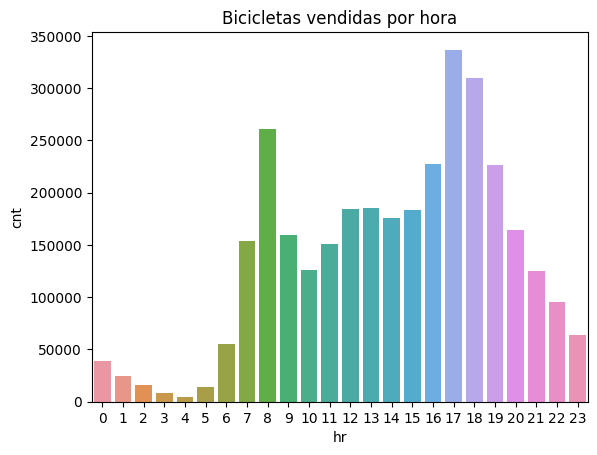

In [467]:
### Prueba de lo obtenido
plt.title('Bicicletas vendidas por hora')
plt.xlabel('hora')
plt.ylabel('Conteo venta bicicletas')
sns.barplot(data = BicisHoras, x = 'hr', y = 'cnt')

### 2. ¿Qué temporada es la mas alta?

In [468]:
BicisSsn = DfBicis[['season','cnt']].groupby(by = ['season']).sum().reset_index()
BicisSsn

season      cnt
0       1   471348
1       2   918589
2       3  1061129
3       4   841613

In [469]:
BicisSsn.query('cnt == cnt.max()')

season      cnt
2       3  1061129

<AxesSubplot:title={'center':'Bicicletas vendidas por temporada'}, xlabel='season', ylabel='cnt'>

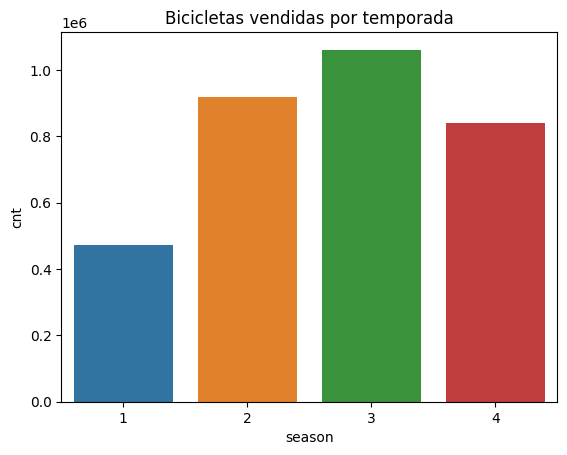

In [470]:
### Prueba
plt.title('Bicicletas vendidas por temporada')
plt.xlabel('temporada')
plt.ylabel('Conteo venta bicicletas')
sns.barplot(data = BicisSsn, x = 'season', y = 'cnt')

### 3. ¿Es la temperatura relevante para el modelo?

#### Índice de correlación y scatter
Primero se analiza mediante un mapa de índice de correlación

<AxesSubplot:title={'center':'Índices de correlación entre variables del DF'}>

<Figure size 640x480 with 0 Axes>

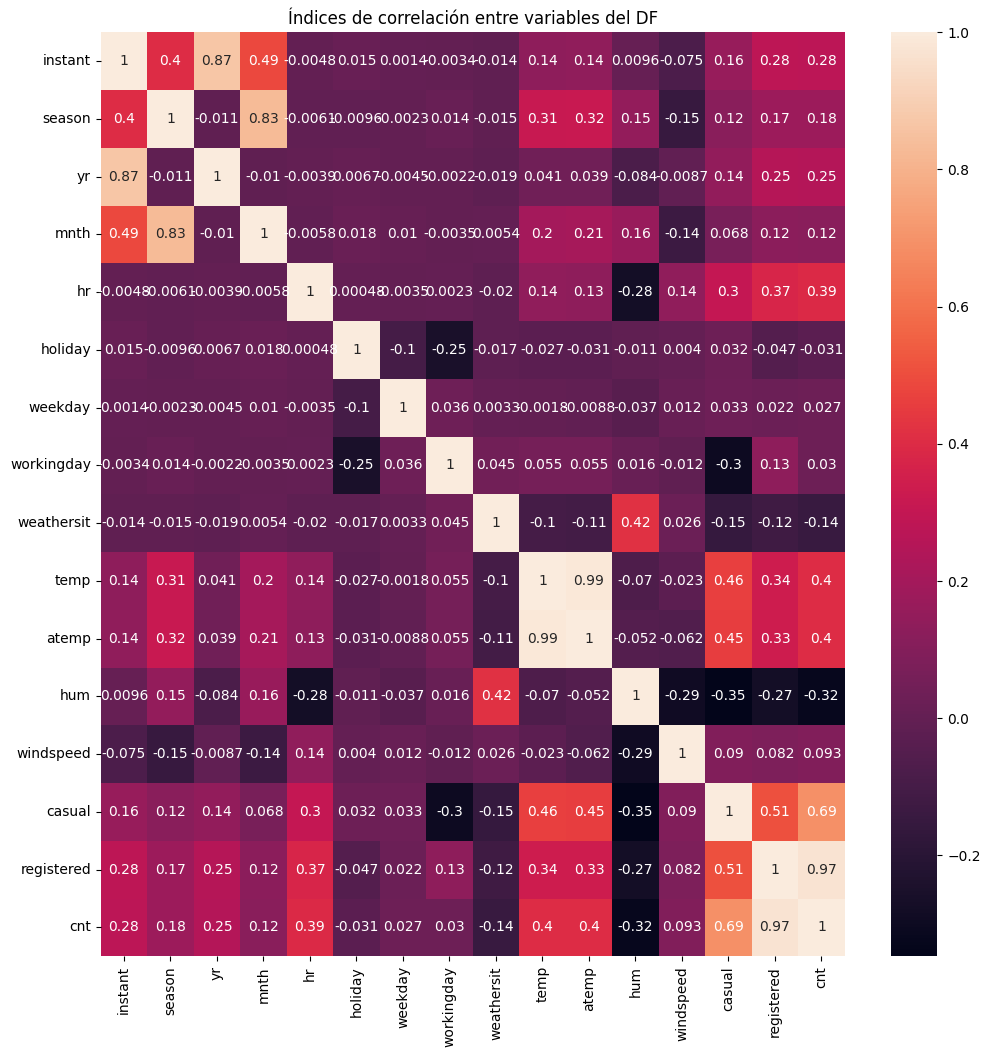

In [471]:
plt.figure()
correlaciones = DfBicis.corr()
plt.figure(figsize = (12,12))
plt.title('Índices de correlación entre variables del DF')
sns.heatmap(data = correlaciones, annot = True, fmt = '0.2g')

No se ve una correlación clara, se realiza un scatterplot

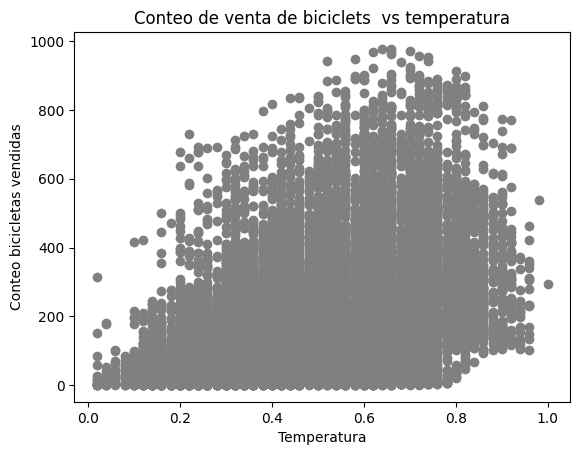

In [472]:
plt.xlabel('Temperatura')
plt.ylabel('Conteo bicicletas vendidas')
plt.title('Conteo de venta de biciclets  vs temperatura')
plt.scatter(data = DfBicis, x = 'temp', y = 'cnt', color = 'gray')

#### Analizando temperatura según temporada
Parece no haber mucha relación. Se procede a separar los datos por temporada

<AxesSubplot:title={'center':'Conteo de venta de biciclets  vs temperatura'}, xlabel='Temperatura', ylabel='Conteo bicicletas vendidas'>

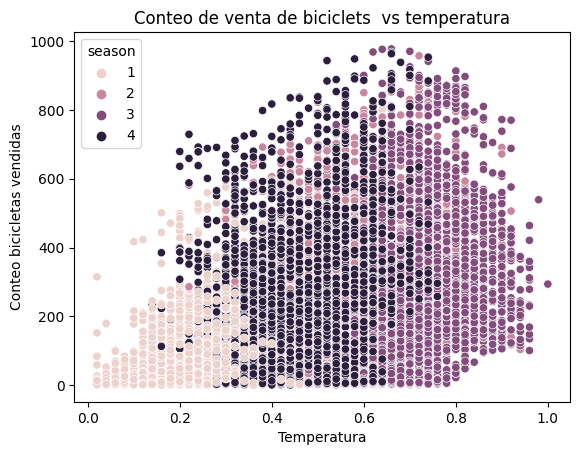

In [473]:
plt.xlabel('Temperatura')
plt.ylabel('Conteo bicicletas vendidas')
plt.title('Conteo de venta de biciclets  vs temperatura')
sns.scatterplot(x = DfBicis.temp, y = DfBicis.cnt, hue = DfBicis.season)



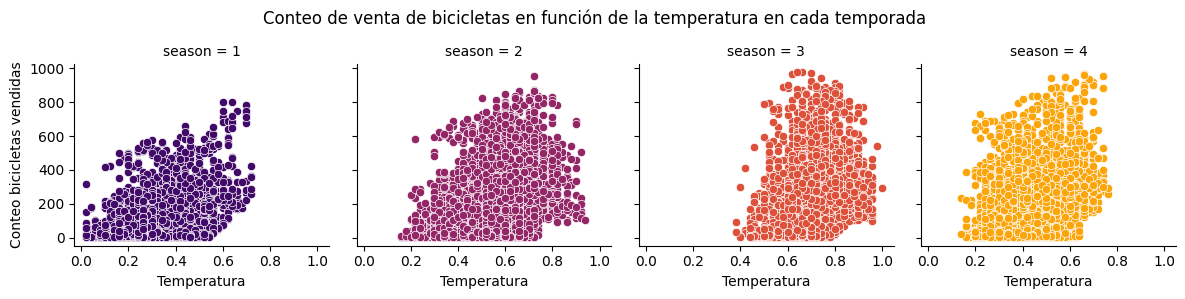

In [474]:
FacetTempScat = sns.FacetGrid(data = DfBicis, col = 'season', hue = 'season', palette= 'inferno')
FacetTempScat.map(sns.scatterplot, 'temp', 'cnt').set_axis_labels('Temperatura','Conteo bicicletas vendidas')
FacetTempScat.fig.subplots_adjust(top = 0.8)
FacetTempScat.fig.suptitle('Conteo de venta de bicicletas en función de la temperatura en cada temporada')
plt.show()

En el scatterplot se ven los datos bastante agrupados y sin relación evidente. Se realizó un lineplot para analizar tendencias

<AxesSubplot:title={'center':'Bicicletas vendidas vs temperatura por cada temporada'}, xlabel='Temperatura', ylabel='Conteo bicicletas vendidas'>

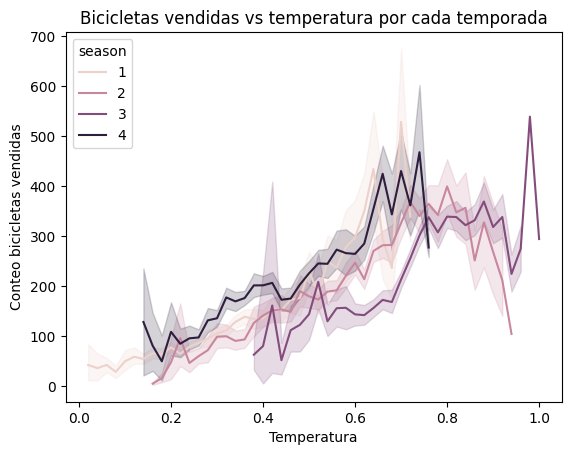

In [475]:
plt.xlabel('Temperatura')
plt.ylabel('Conteo bicicletas vendidas')
plt.title('Bicicletas vendidas vs temperatura por cada temporada')
sns.lineplot(data = DfBicis, x = 'temp', y = 'cnt', hue = 'season')

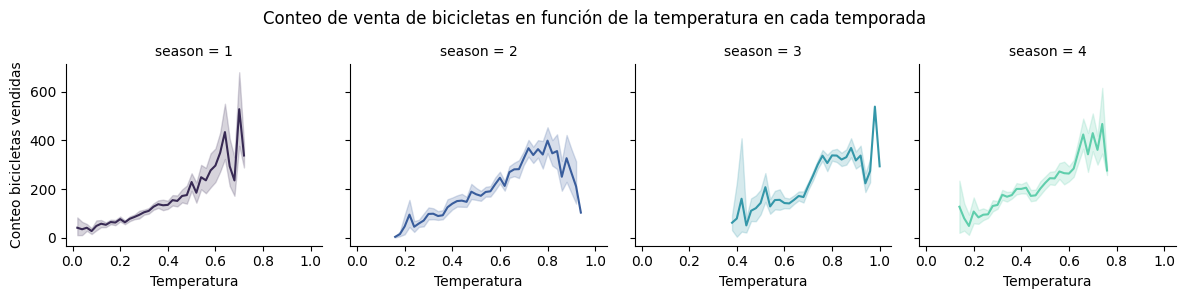

In [476]:
FacetTemplin = sns.FacetGrid(data = DfBicis, col = 'season', hue = 'season', palette= 'mako')
FacetTemplin.map(sns.lineplot, 'temp', 'cnt').set_axis_labels('Temperatura','Conteo bicicletas vendidas')
FacetTemplin.fig.subplots_adjust(top = 0.8)
FacetTemplin.fig.suptitle('Conteo de venta de bicicletas en función de la temperatura en cada temporada')
plt.show()

También se obtuvieron los máximos y mínimos de temperatura por temporada.

In [477]:
DfBicis[['season','temp']].groupby('season').max()

temp
season      
1       0.72
2       0.94
3       1.00
4       0.76

In [478]:
DfBicis[['season','temp']].groupby('season').min()

temp
season      
1       0.02
2       0.16
3       0.38
4       0.14

#### Análisis de temperatura por hora
También se hizo un análisis de la temperatura en función de la hora para verificar su variación. Se inició con un lineplot y luego con scatterplots.

<AxesSubplot:title={'center':'Gráfica temperatura vs hora del día'}, xlabel='Hora del día', ylabel='Temperatura'>

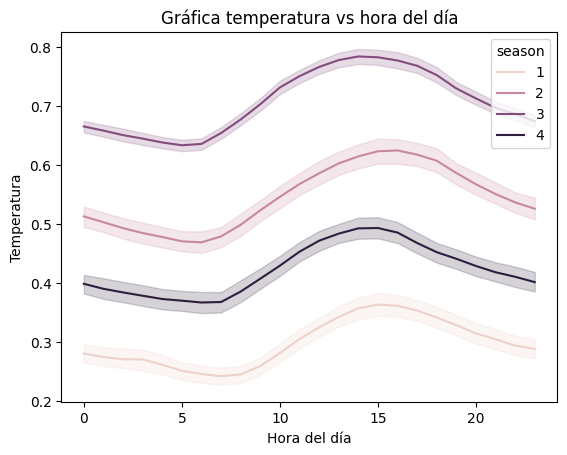

In [479]:
plt.xlabel('Hora del día')
plt.ylabel('Temperatura')
plt.title('Gráfica temperatura vs hora del día')
sns.lineplot(data = DfBicis, x = 'hr', y = 'temp', hue = 'season')

<AxesSubplot:title={'center':'Gráfica temperatura vs hora del día'}, xlabel='Hora del día', ylabel='Temperatura'>

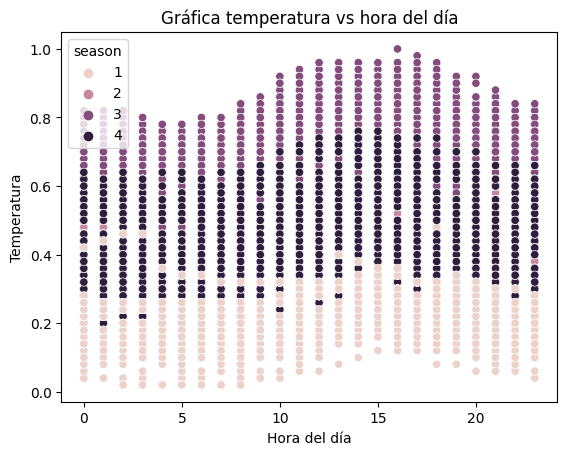

In [480]:
plt.xlabel('Hora del día')
plt.ylabel('Temperatura')
plt.title('Gráfica temperatura vs hora del día')
sns.scatterplot(data = DfBicis, x = 'hr', y = 'temp', hue = 'season')

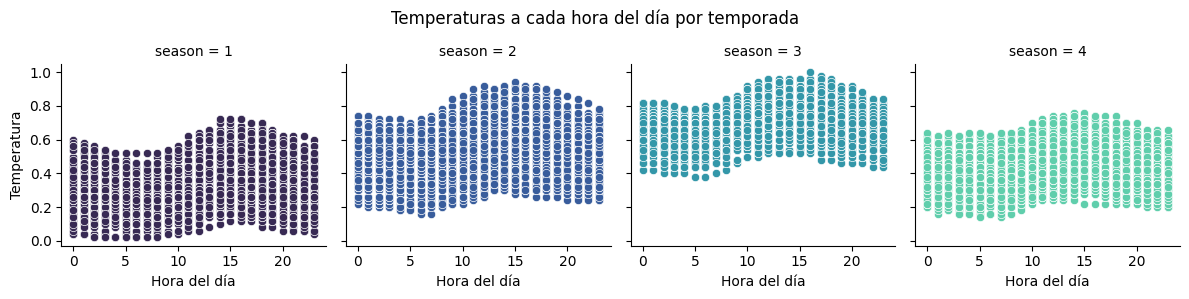

In [481]:

FacetHr = sns.FacetGrid(data = DfBicis, col = 'season', hue = 'season', palette = 'mako')
FacetHr.map(sns.scatterplot, 'hr', 'temp').set_axis_labels('Hora del día', 'Temperatura')
FacetHr.fig.subplots_adjust(top = 0.8)
FacetHr.fig.suptitle('Temperaturas a cada hora del día por temporada')
plt.show()

#### Temperatura por weathersit


Se analizó también la relación entre la variable Weathersit con la temperatura y las ventas. Se presume que weathersit es una bandera que indica si es un día soleado, nublado, lluvioso o con nieve

<AxesSubplot:title={'center':'Bicicletas vendidas vs temperatura dependiendo la situación climática'}, xlabel='Temperatura', ylabel='Conteo bicicletas vendidas'>

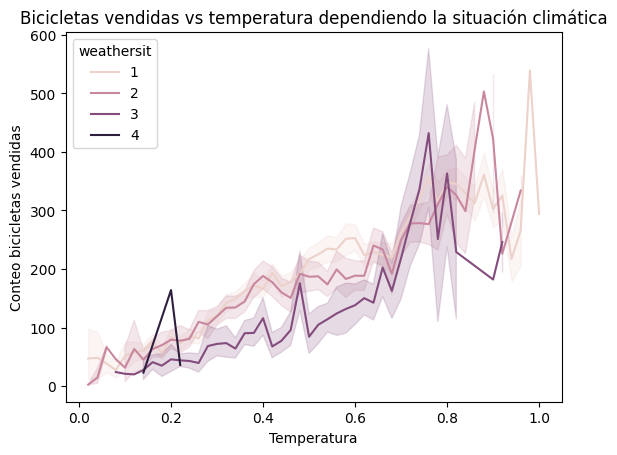

In [482]:
plt.xlabel('Temperatura')
plt.ylabel('Conteo bicicletas vendidas')
plt.title('Bicicletas vendidas vs temperatura dependiendo la situación climática')
sns.lineplot(data = DfBicis, x = 'temp', y = 'cnt', hue = 'weathersit')

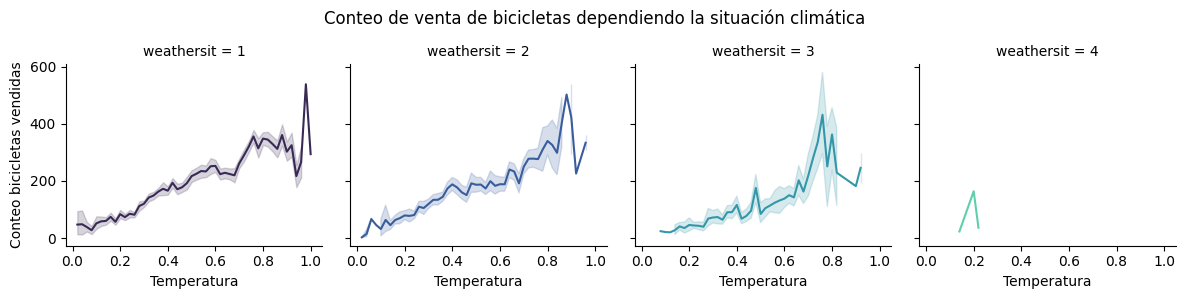

In [483]:
FacetTemplin = sns.FacetGrid(data = DfBicis, col = 'weathersit', hue = 'weathersit', palette= 'mako')
FacetTemplin.map(sns.lineplot, 'temp', 'cnt').set_axis_labels('Temperatura','Conteo bicicletas vendidas')
FacetTemplin.fig.subplots_adjust(top = 0.8)
FacetTemplin.fig.suptitle('Conteo de venta de bicicletas dependiendo la situación climática')
plt.show()

#### Análisis compuesto por temporada y situación climática

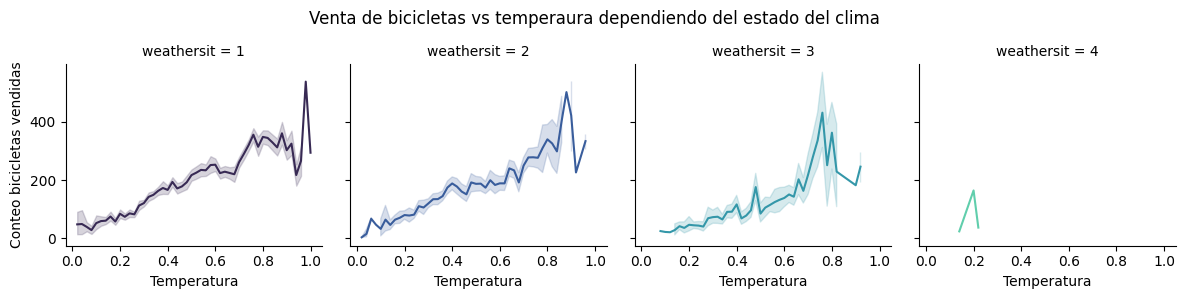

In [484]:
FacetTHS1 = sns.FacetGrid(data = DfBicis, col = 'weathersit', hue = 'weathersit', palette= 'mako')
FacetTHS1.map(sns.lineplot, 'temp', 'cnt').set_axis_labels('Temperatura','Conteo bicicletas vendidas')
FacetTHS1.fig.subplots_adjust(top = 0.8)
FacetTHS1.fig.suptitle('Venta de bicicletas vs temperaura dependiendo del estado del clima')
plt.show()

#### Análisis compuesto clima y temporada

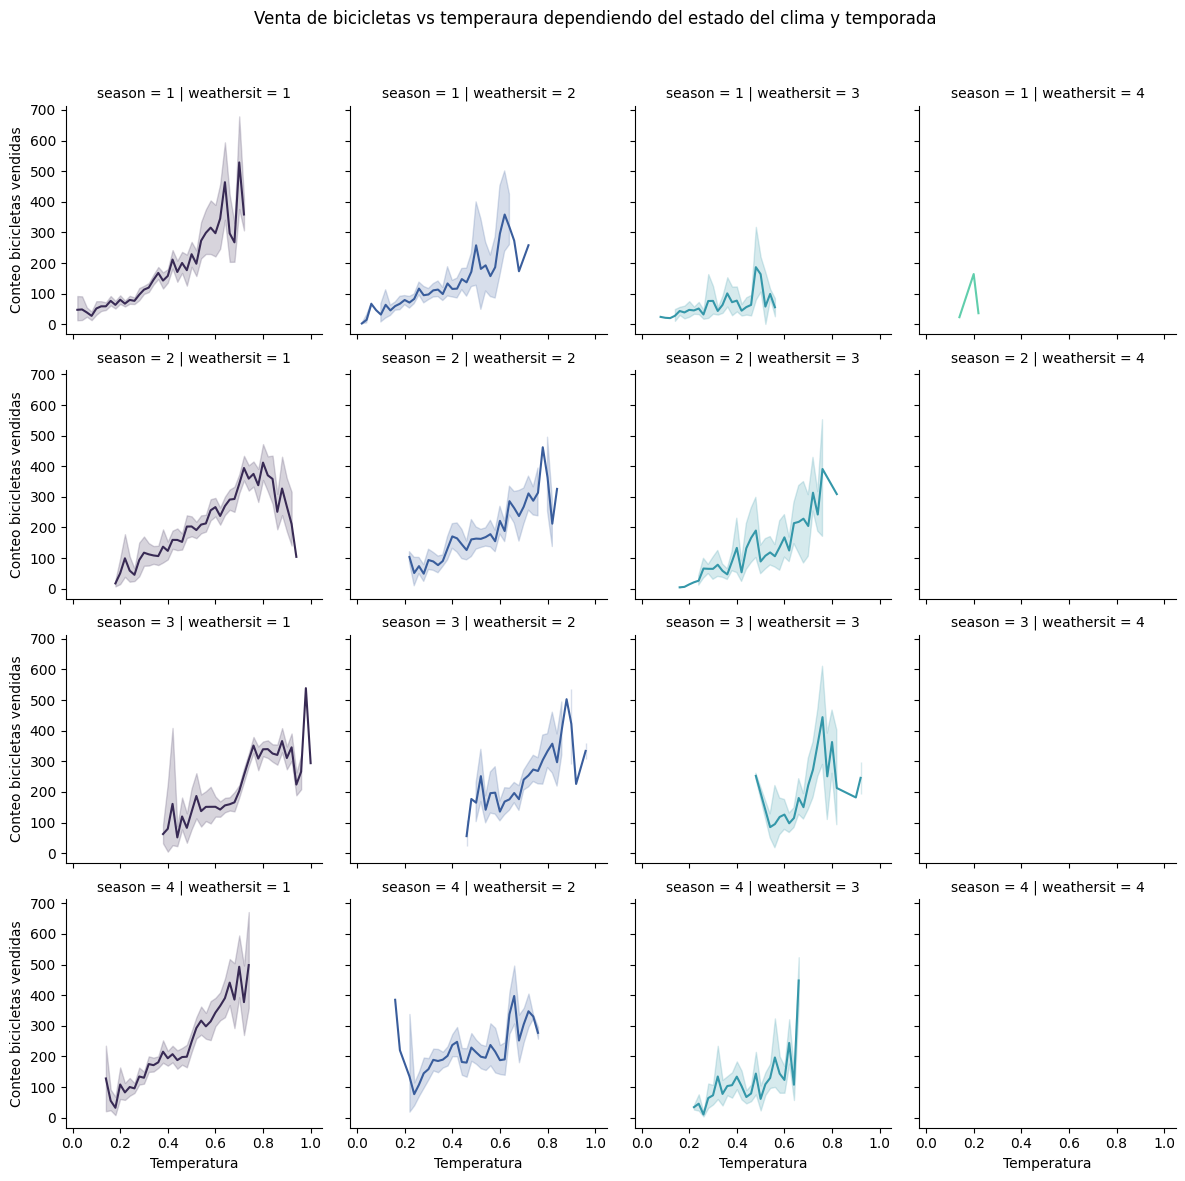

In [485]:
FacetTHS = sns.FacetGrid(data = DfBicis, col = 'weathersit', row = 'season', hue = 'weathersit', palette= 'mako')
FacetTHS.map(sns.lineplot, 'temp', 'cnt').set_axis_labels('Temperatura','Conteo bicicletas vendidas')
FacetTHS.fig.subplots_adjust(top = 0.9)
FacetTHS.fig.suptitle('Venta de bicicletas vs temperaura dependiendo del estado del clima y temporada')
plt.show()

#### Conclusión

Los análisis anteriores evidencian que el número de bicicletas vendidas aumenta a medida que la temperatura aumenta. Esto independientemente de la temporada o la condición climática, por lo que se determina que sí es una variable influyente.

### 4. ¿Es la humedad relevante para el modelo?

#### Índice de correlación y scatter
Se inicia analizando un mapa de correlaciones

<AxesSubplot:>

<Figure size 640x480 with 0 Axes>

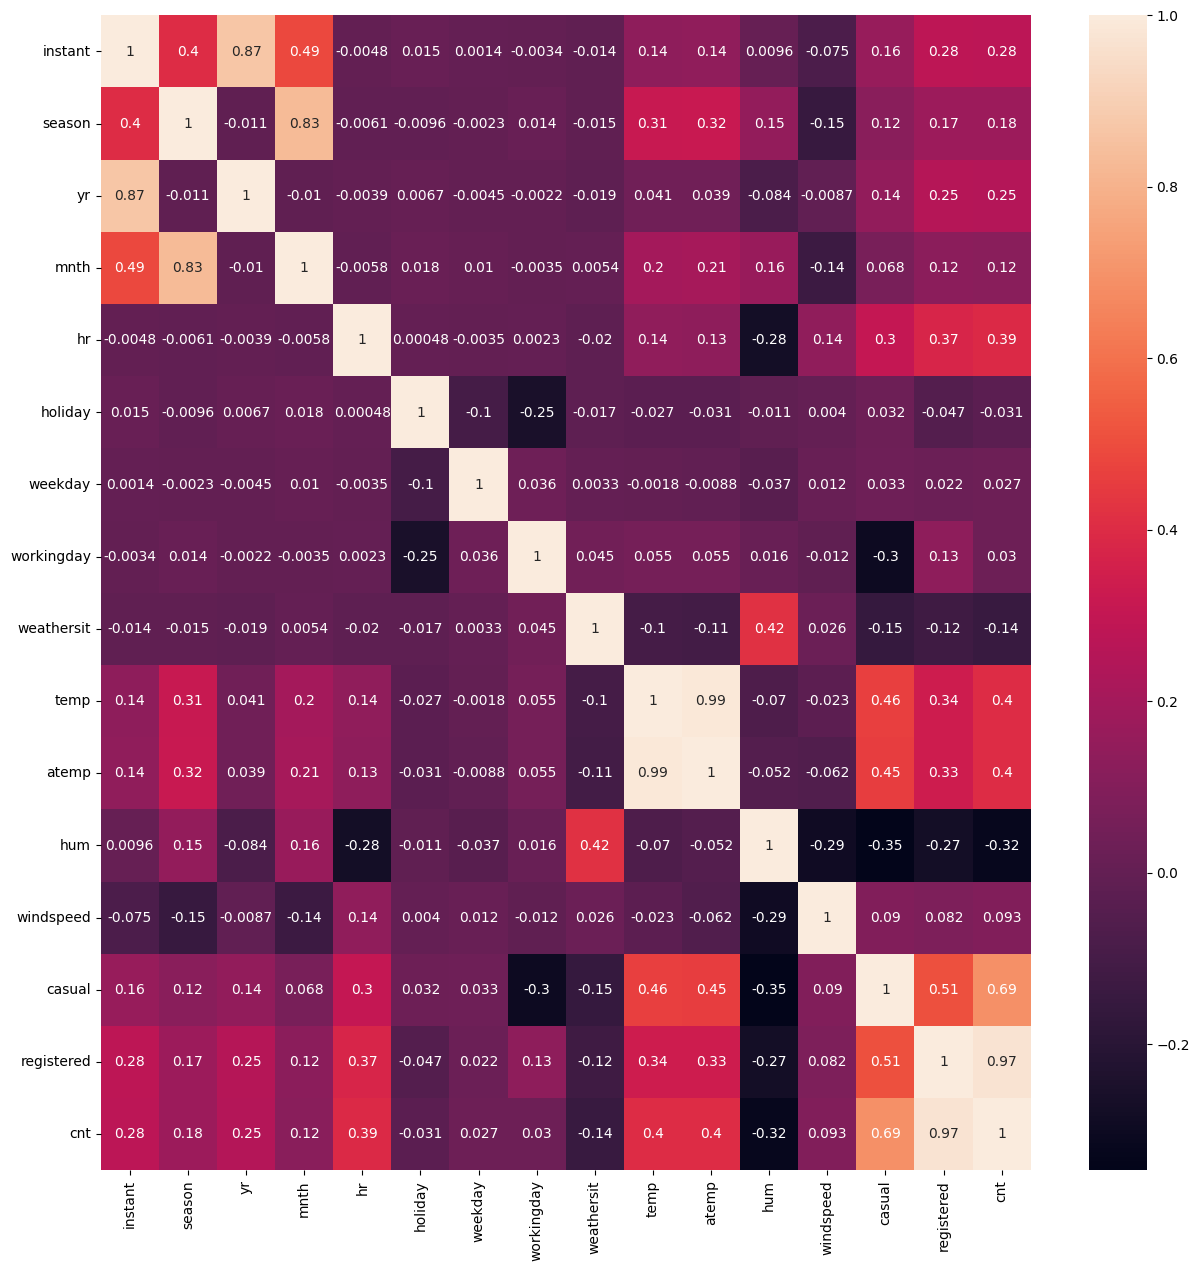

In [486]:
plt.figure()
correlaciones = DfBicis.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = correlaciones, annot = True, fmt = '0.2g')

Puede observarse que no se ve una correlación clara entre la humedad y el conteo de bicicletas vendidas. Se procederá con un scatterplot

Text(0, 0.5, 'Ventas')

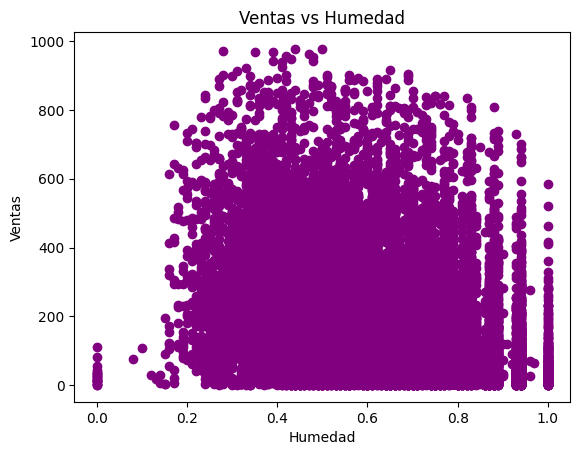

In [487]:
plt.scatter(x = DfBicis['hum'], y = DfBicis['cnt'], color = 'purple')
plt.title('Ventas vs Humedad')
plt.xlabel('Humedad')
plt.ylabel('Ventas')


#### Análisis por temporada
No es posible arrojar conclusiones a partir de la gráfica, así que se realiza un análisis por temporada

<AxesSubplot:title={'center':'Conteo de bicicletas vs humedad según la temporada'}, xlabel='Humedad', ylabel='Conteo bicicletas vendidas'>

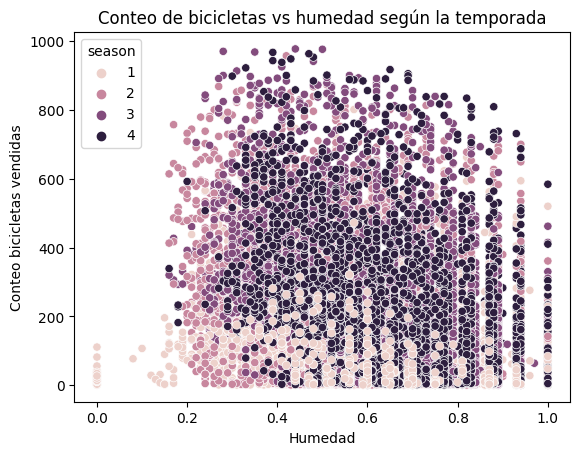

In [488]:
plt.xlabel('Humedad')
plt.ylabel('Conteo bicicletas vendidas')
plt.title('Conteo de bicicletas vs humedad según la temporada')
sns.scatterplot(x = DfBicis.hum, y = DfBicis.cnt, hue = DfBicis.season)

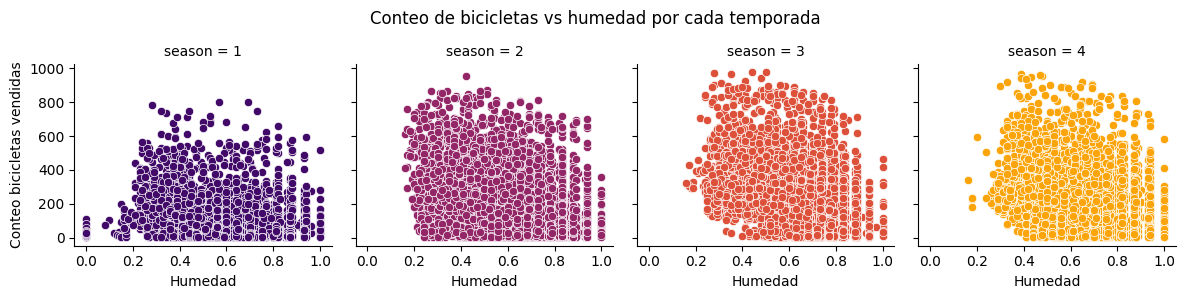

In [489]:
FacetHum = sns.FacetGrid(data = DfBicis, col = 'season', hue = 'season', palette= 'inferno')
FacetHum.map(sns.scatterplot, 'hum', 'cnt').set_axis_labels('Humedad','Conteo bicicletas vendidas')
FacetHum.fig.subplots_adjust(top = 0.8)
FacetHum.fig.suptitle('Conteo de bicicletas vs humedad por cada temporada')
plt.show()

<AxesSubplot:title={'center':'Conteo de bicicletas vendidas vs humedad por temporada'}, xlabel='Humedad', ylabel='Conteo bicicletas vendidas'>

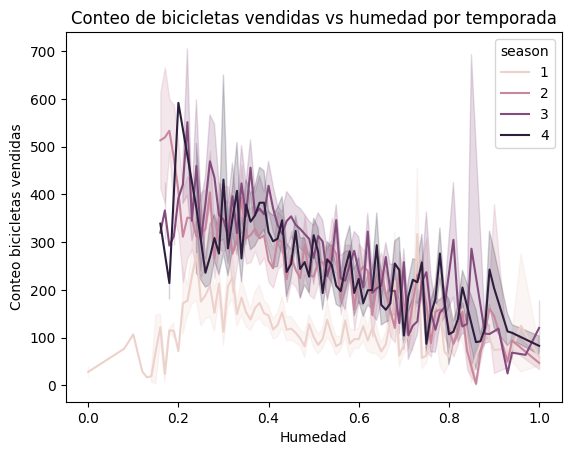

In [490]:
plt.xlabel('Humedad')
plt.ylabel('Conteo bicicletas vendidas')
plt.title('Conteo de bicicletas vendidas vs humedad por temporada')
sns.lineplot(data = DfBicis, x = 'hum', y = 'cnt', hue = 'season')

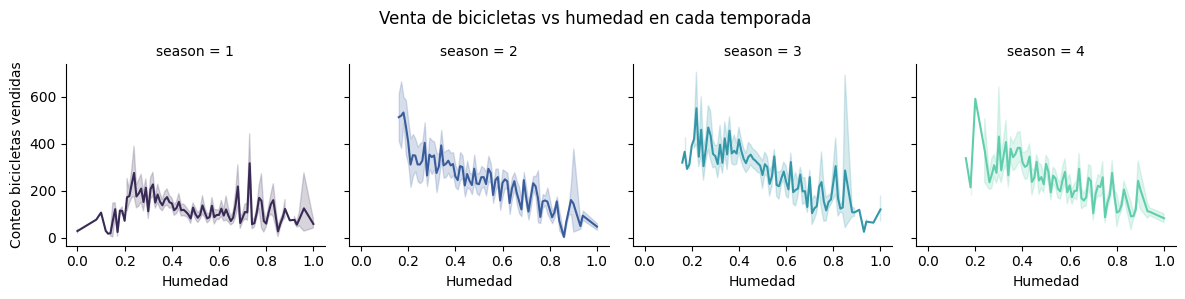

In [491]:
FacetHumLin = sns.FacetGrid(data = DfBicis, col = 'season', hue = 'season', palette= 'mako')
FacetHumLin.map(sns.lineplot, 'hum', 'cnt').set_axis_labels('Humedad','Conteo bicicletas vendidas')
FacetHumLin.fig.subplots_adjust(top = 0.8)
FacetHumLin.fig.suptitle('Venta de bicicletas vs humedad en cada temporada')
plt.show()

#### Análisis mediante Weathersit

Se hizo un análisis mediante Weathersit para ver el impacto que tiene la humedad.

<AxesSubplot:title={'center':'Conteo de bicicletas vendidas vs humedad dependiendo el estado del tiempo'}, xlabel='Humedad', ylabel='Conteo bicicletas vendidas'>

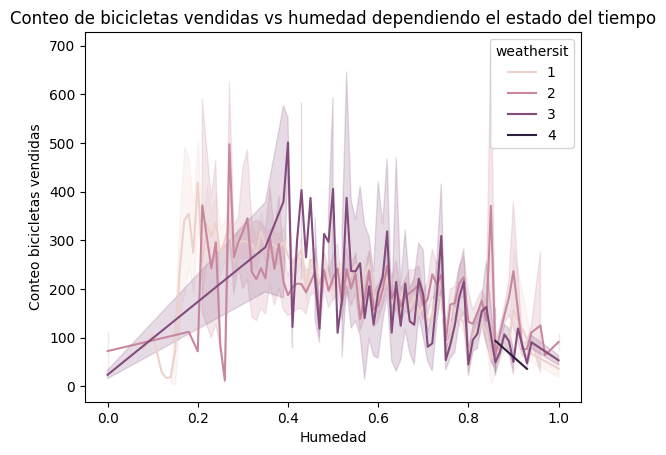

In [492]:
plt.xlabel('Humedad')
plt.ylabel('Conteo bicicletas vendidas')
plt.title('Conteo de bicicletas vendidas vs humedad dependiendo el estado del tiempo')
sns.lineplot(data = DfBicis, x = 'hum', y = 'cnt', hue = 'weathersit')

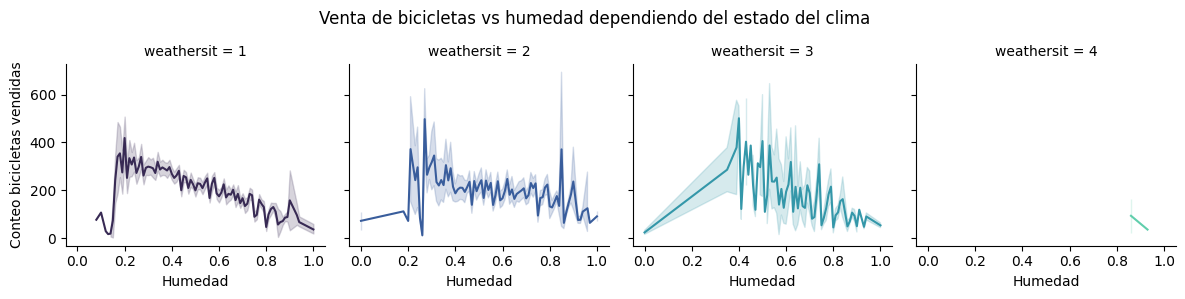

In [493]:
FacetHTS1 = sns.FacetGrid(data = DfBicis, col = 'weathersit', hue = 'weathersit', palette= 'mako')
FacetHTS1.map(sns.lineplot, 'hum', 'cnt').set_axis_labels('Humedad','Conteo bicicletas vendidas')
FacetHTS1.fig.subplots_adjust(top = 0.8)
FacetHTS1.fig.suptitle('Venta de bicicletas vs humedad dependiendo del estado del clima')
plt.show()

#### Análisis compuesto temporada y situación climática

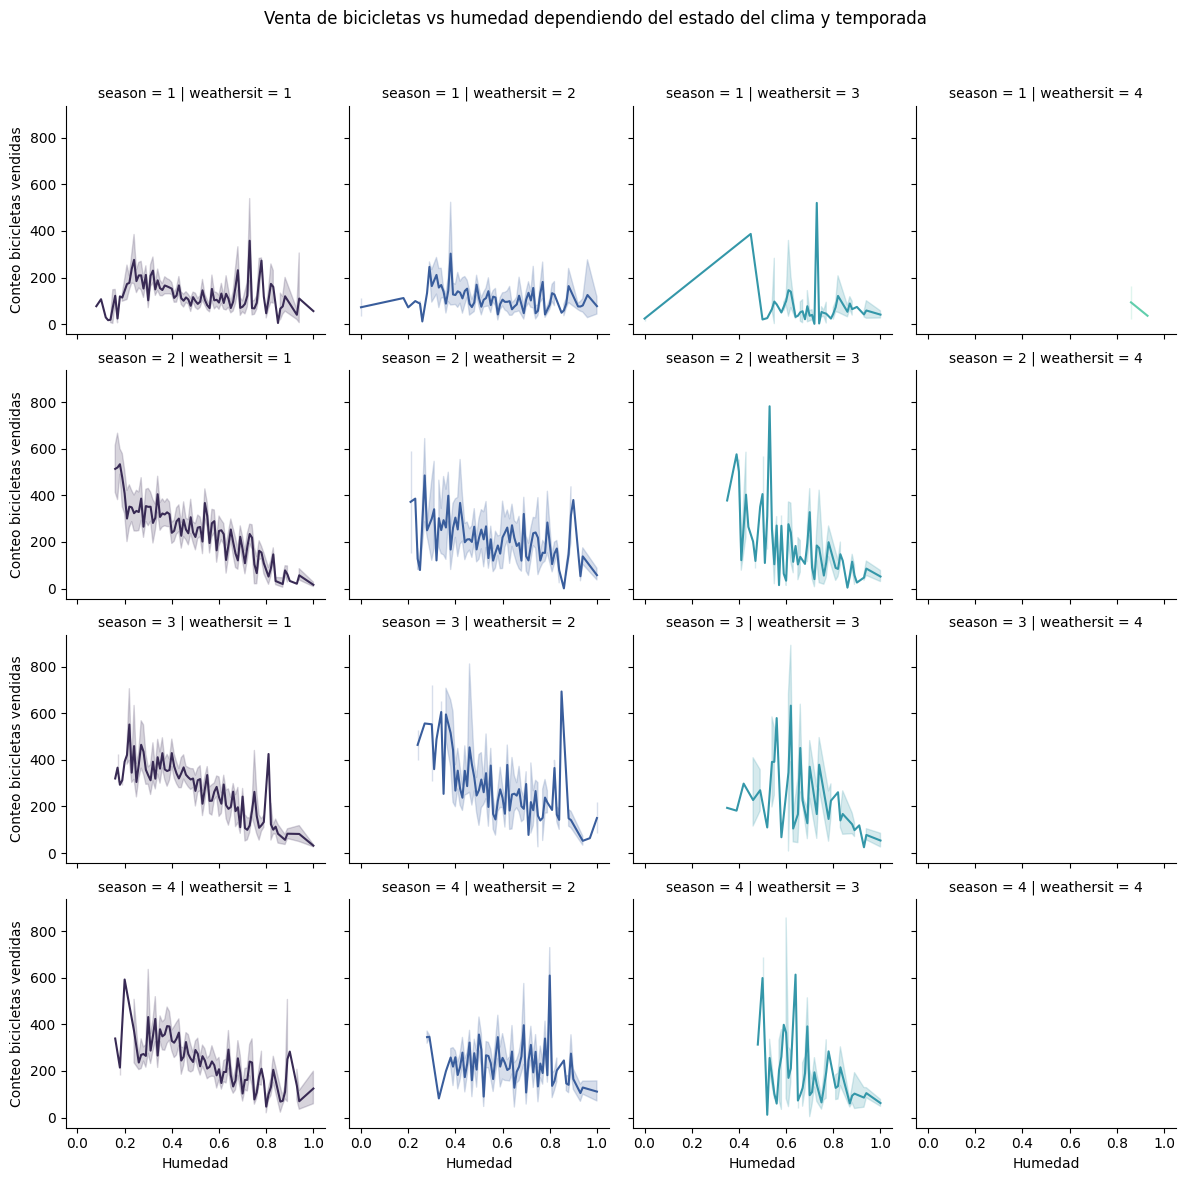

In [494]:
FacetHTSlin = sns.FacetGrid(data = DfBicis, col = 'weathersit', row = 'season', hue = 'weathersit', palette= 'mako')
FacetHTSlin.map(sns.lineplot, 'hum', 'cnt').set_axis_labels('Humedad','Conteo bicicletas vendidas')
FacetHTSlin.fig.subplots_adjust(top = 0.9)
FacetHTSlin.fig.suptitle('Venta de bicicletas vs humedad dependiendo del estado del clima y temporada')
plt.show()

#### Conclusión

Es posible notar que, a mayor humedad, menor es la venta de bicicletas. Esto se ve a través de las temporadas y condiciones climática. Para este modelo, se consirerará relevante la variable.

### 5. ¿Qué condiciones serian ideales para nuestra demanda?

Para analizar esto, se ven las variables de mes, hora, temporada y situación climática, y cómo afectan las ventas


#### Ventas por hora por temporada

<AxesSubplot:title={'center':'Conteo bicicletas vendidas vs hora dependiendo la temporada'}, xlabel='hora', ylabel='Conteo bicicletas vendidas'>

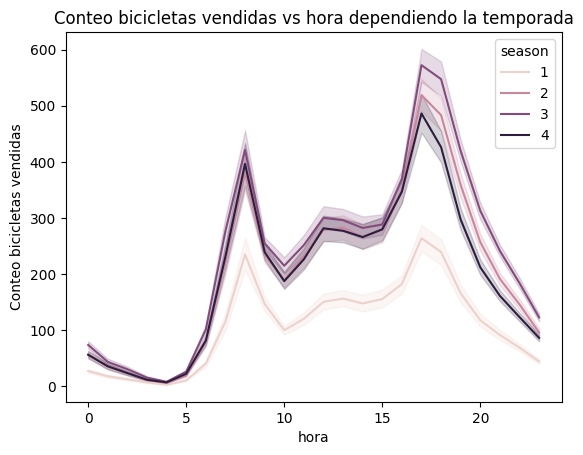

In [495]:
plt.xlabel('hora')
plt.ylabel('Conteo bicicletas vendidas')
plt.title('Conteo bicicletas vendidas vs hora dependiendo la temporada')
sns.lineplot(data = DfBicis, x = 'hr', y = 'cnt', hue = 'season')

#### Ventas por mes

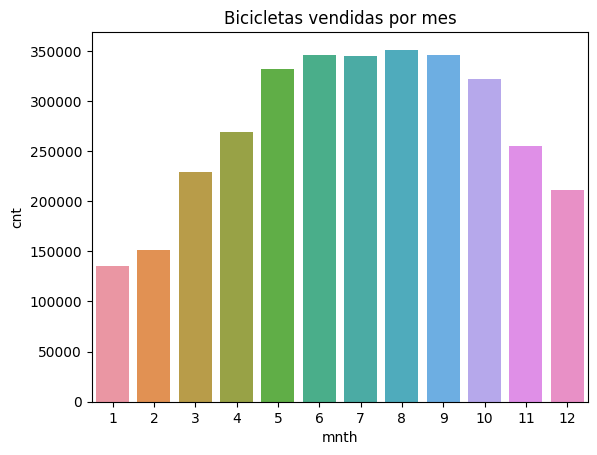

In [496]:
BicisMnth = DfBicis[['mnth','cnt']].groupby('mnth').sum().reset_index()
plt.title('Bicicletas vendidas por mes')
plt.xlabel('mes')
plt.ylabel('Conteo venta bicicletas')
sns.barplot(data = BicisMnth, x = 'mnth', y = 'cnt')
plt.show()

También se analizan las temperaturas y humedad de los meses

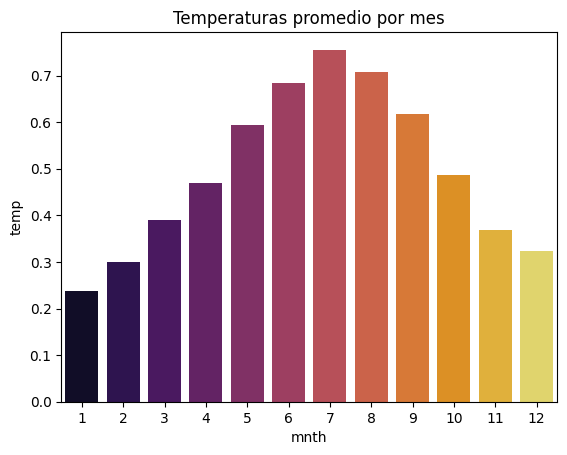

In [497]:
BicisTM = DfBicis[['mnth','temp']].groupby('mnth').mean().reset_index()
plt.title('Temperaturas promedio por mes')
plt.xlabel('mes')
plt.ylabel('Temperaturas máximas')
sns.barplot(data = BicisTM, x = 'mnth', y = 'temp', palette = 'inferno')
plt.show()

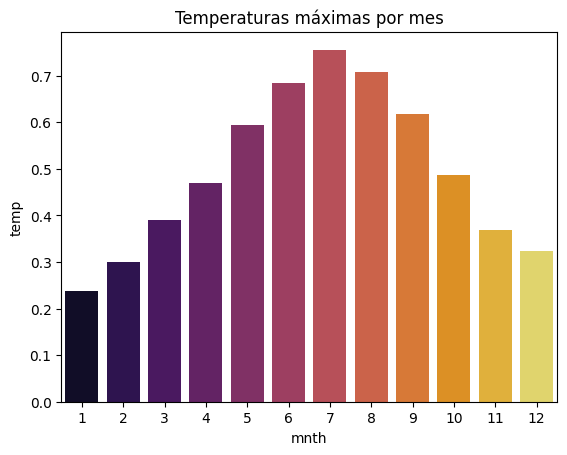

In [498]:
BicisTMmax = DfBicis[['mnth','temp']].groupby('mnth').max().reset_index()
plt.title('Temperaturas máximas por mes')
plt.xlabel('mes')
plt.ylabel('Temperaturas máximas')
sns.barplot(data = BicisTM, x = 'mnth', y = 'temp', palette = 'inferno')
plt.show()

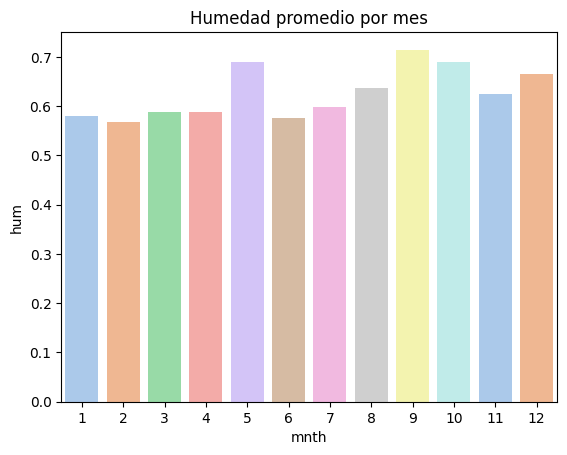

In [499]:
BicisHM = DfBicis[['mnth','hum']].groupby('mnth').mean().reset_index()
plt.title('Humedad promedio por mes')
plt.xlabel('mes')
plt.ylabel('Humedad máxima')
sns.barplot(data = BicisHM, x = 'mnth', y = 'hum', palette = 'pastel')
plt.show()

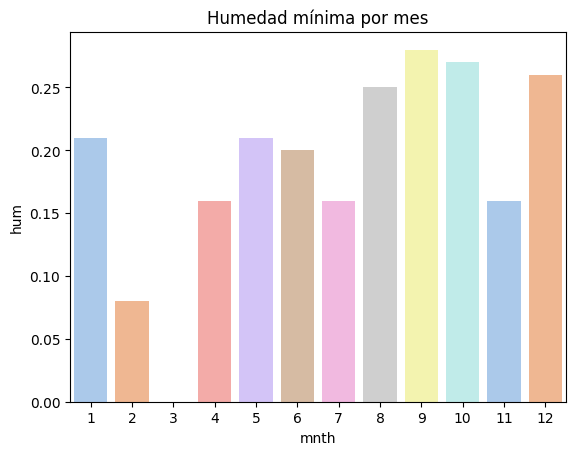

In [500]:
BicisHMmin = DfBicis[['mnth','hum']].groupby('mnth').min().reset_index()
plt.title('Humedad mínima por mes')
plt.xlabel('mes')
plt.ylabel('Humedad mínima')
sns.barplot(data = BicisHMmin, x = 'mnth', y = 'hum', palette = 'pastel')
plt.show()

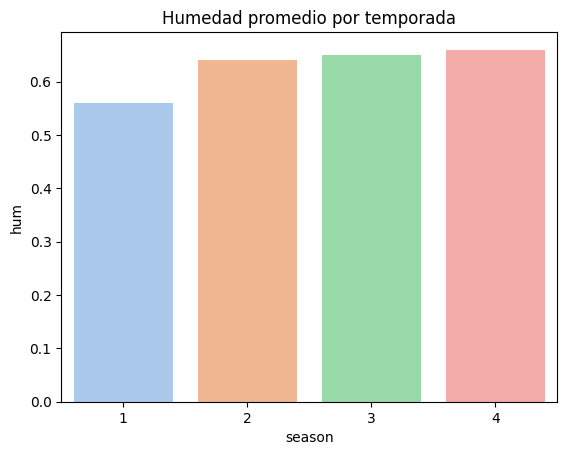

In [501]:
BicisHS = DfBicis[['season','hum']].groupby('season').median().reset_index()
plt.title('Humedad promedio por temporada')
plt.xlabel('mes')
plt.ylabel('Humedad máxima')
sns.barplot(data = BicisHS, x = 'season', y = 'hum', palette = 'pastel')
plt.show()

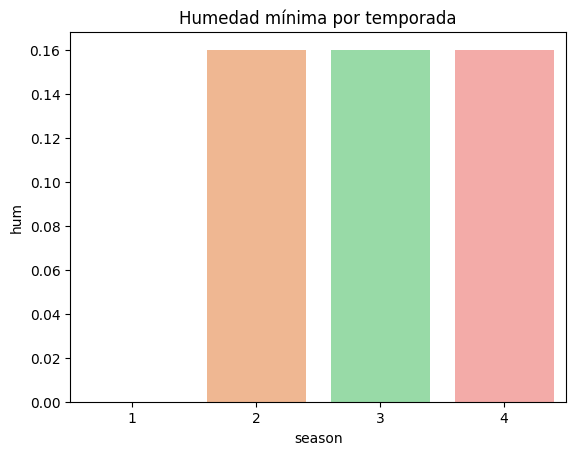

In [502]:
BicisHSmin = DfBicis[['season','hum']].groupby('season').min().reset_index()
plt.title('Humedad mínima por temporada')
plt.xlabel('mes')
plt.ylabel('Humedad máxima')
sns.barplot(data = BicisHSmin, x = 'season', y = 'hum', palette = 'pastel')
plt.show()

#### Analizando la temporada

Ya se sabe que la tercera temporada es donde más bicicletas se venden. Se analizan las temperaturas y humedades en estas temporadas

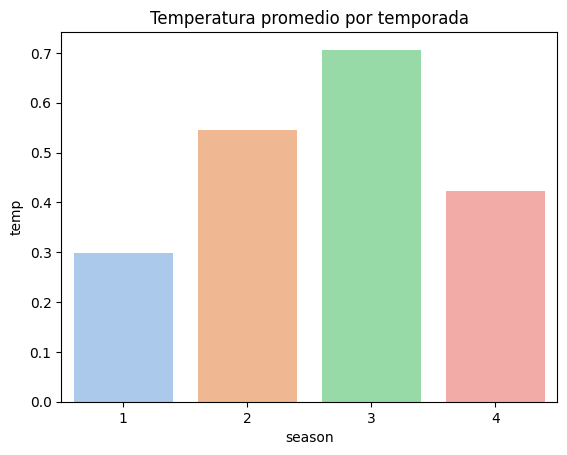

In [503]:
BicisTS = DfBicis[['season','temp']].groupby('season').mean().reset_index()
plt.title('Temperatura promedio por temporada')
plt.xlabel('mes')
plt.ylabel('Temperatura')
sns.barplot(data = BicisTS, x = 'season', y = 'temp', palette = 'pastel')
plt.show()

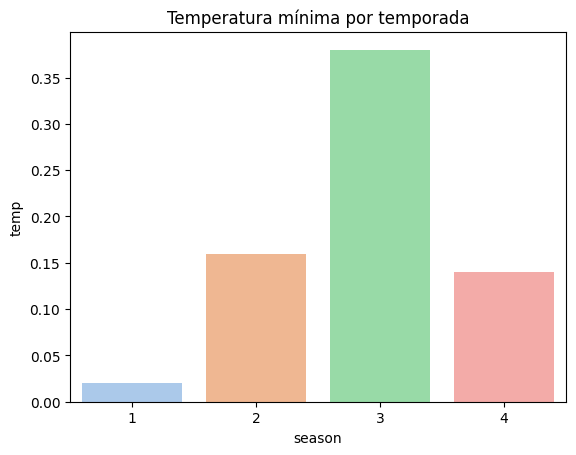

In [504]:
BicisTSmin = DfBicis[['season','temp']].groupby('season').min().reset_index()
plt.title('Temperatura mínima por temporada')
plt.xlabel('mes')
plt.ylabel('Temperatura mínima')
sns.barplot(data = BicisTSmin, x = 'season', y = 'temp', palette = 'pastel')
plt.show()

#### Analizando Weathersit

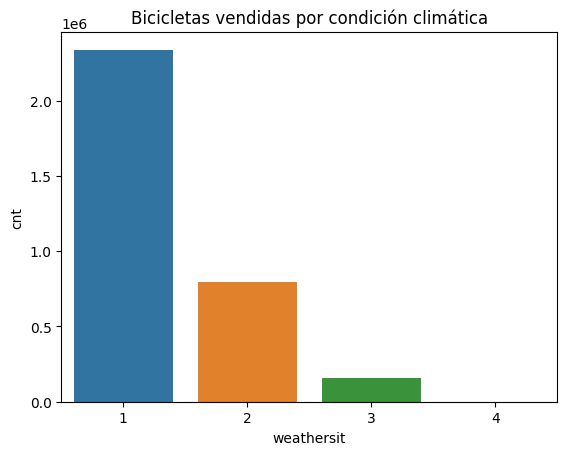

In [505]:
BicisWsth = DfBicis[['weathersit','cnt']].groupby('weathersit').sum().reset_index()
plt.title('Bicicletas vendidas por condición climática')
plt.xlabel('condición')
plt.ylabel('Conteo venta bicicletas')
sns.barplot(data = BicisWsth, x = 'weathersit', y = 'cnt')
plt.show()

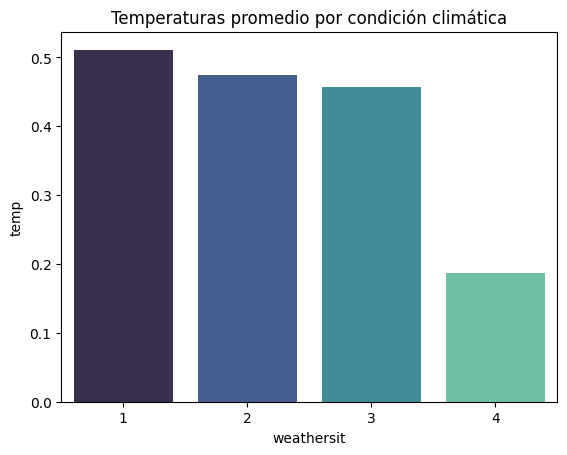

In [506]:
BicisWTmean = DfBicis[['weathersit','temp']].groupby('weathersit').mean().reset_index()
plt.title('Temperaturas promedio por condición climática')
plt.xlabel('condición')
plt.ylabel('Temperatura promedio')
sns.barplot(data = BicisWTmean, x = 'weathersit', y = 'temp', palette = 'mako')
plt.show()

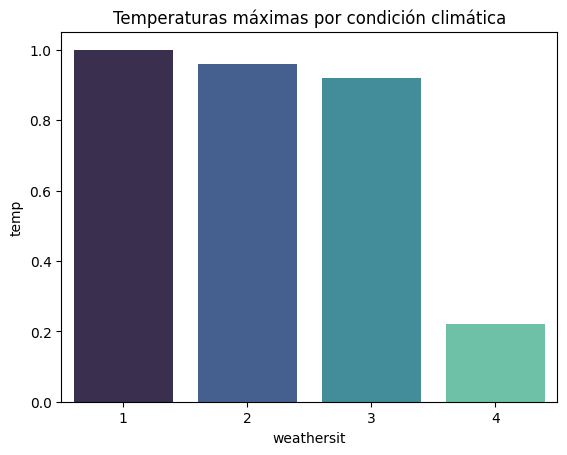

In [507]:
BicisWTmax = DfBicis[['weathersit','temp']].groupby('weathersit').max().reset_index()
plt.title('Temperaturas máximas por condición climática')
plt.xlabel('condición')
plt.ylabel('Temperatura promedio')
sns.barplot(data = BicisWTmax, x = 'weathersit', y = 'temp', palette = 'mako')
plt.show()

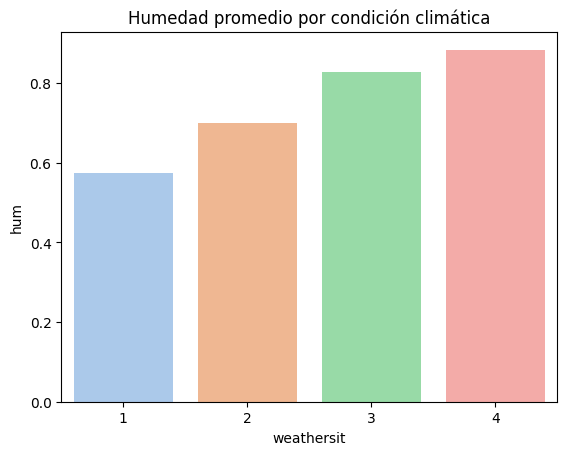

In [508]:
BicisWHmean = DfBicis[['weathersit','hum']].groupby('weathersit').mean().reset_index()
plt.title('Humedad promedio por condición climática')
plt.xlabel('condición')
plt.ylabel('Humedad promedio')
sns.barplot(data = BicisWHmean, x = 'weathersit', y = 'hum', palette = 'pastel')
plt.show()

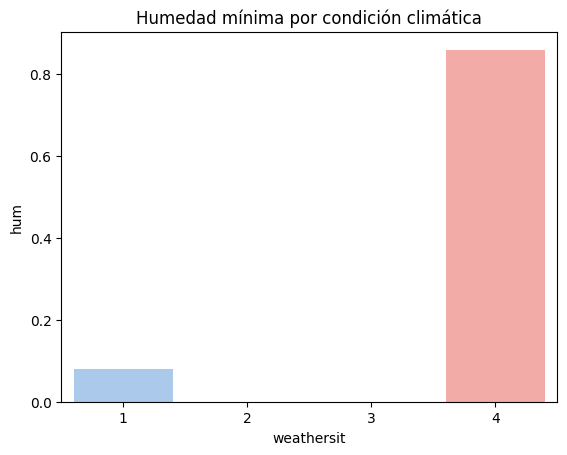

In [509]:
BicisWHmin = DfBicis[['weathersit','hum']].groupby('weathersit').min().reset_index()
plt.title('Humedad mínima por condición climática')
plt.xlabel('condición')
plt.ylabel('Humedad mínima')
sns.barplot(data = BicisWHmin, x = 'weathersit', y = 'hum', palette = 'pastel')
plt.show()

#### Analizando el año

<AxesSubplot:xlabel='yr', ylabel='cnt'>

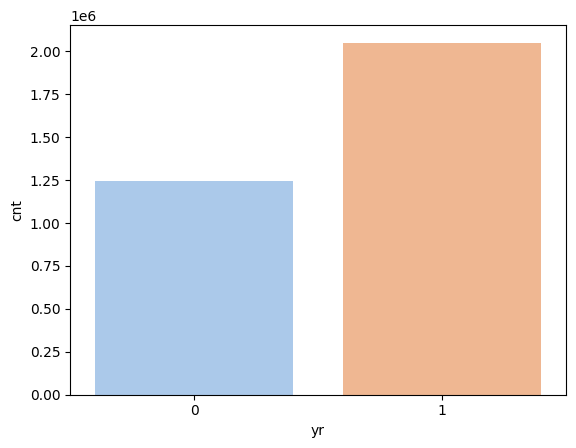

In [510]:
BicisAnio = DfBicis[['yr', 'cnt']].groupby('yr').sum().reset_index()
sns.barplot( data = BicisAnio, x = 'yr', y = 'cnt', palette = 'pastel')

Puede observarse que la cantidad de ventas aumentó al siguiente año, por lo que puede proyectarse que a más años, más crecerá.

#### Condiciones Ideales

Las condiciones ideales para vender bicicletas, según los datos analizados, son las siguientes:
1. Que la temperatura sea alta
2. Que la humedad sea baja, alrededor de 0.2
3. Que sea entre las 17 y 18 horas
4. Que se encuentre en la temporada 3 (se presume que es otoño)
5. Que la condición climátia sea 1 (se presume soleada)
6. El mes que coincide con todas estas variables es agosto.
7. El año debe ser el año 1.

## Estimación de la demanda de bicicletas

Para realizar esto, se utiliza un modelo de regresión mutilineal utilizando scikit-learn.

In [511]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import preprocessing

Luego, se toman las X que se usarán del df original de bicis. Para este análisis, se tomarán en cuenta las siguientes variables:
* Hora
* Temporada
* Temperatura
* Situación climática
* Humedad

Se toman las Y y se colocan en otro df. En este caso, las y son los valores de la columna cnt.

In [512]:
DfX = DfBicis[['hr', 'season', 'temp', 'hum','weathersit', 'yr']]
DfY = DfBicis['cnt']


A continuación, se generan los sets de entrenamiento y prueba

In [513]:
X_train, X_test, y_train, y_test = train_test_split(
    DfX, DfY, test_size=0.2, random_state=101)

A partir de esto, es posible realizar el modelo

In [514]:
ModeloBicis = LinearRegression()
ModeloBicis.fit(X_train,y_train)

LinearRegression()

In [515]:
Ypredichas = ModeloBicis.predict(X_test)

In [516]:
MSE = mean_squared_error(y_test,Ypredichas)
MAE = mean_absolute_error(y_test,Ypredichas)
CorrModelo = r2_score(y_test,Ypredichas)
CoefModelo = ModeloBicis.coef_
InterModelo = ModeloBicis.intercept_
print(f'el MSE es: {MSE}')
print(f'El MAE es: {MAE}')
print(f'La correlación es: {CorrModelo}')
print(f'Coeficientes: {CoefModelo}')
print(f'Intercepto: {InterModelo}')

el MSE es: 20167.481541471305
El MAE es: 106.09269426411325
La correlación es: 0.3747833704972082
Coeficientes: [   7.78846964   20.19029593  281.30966588 -205.12130495   -2.3168912
   80.87449593]
Intercepto: 0.7945739527455373


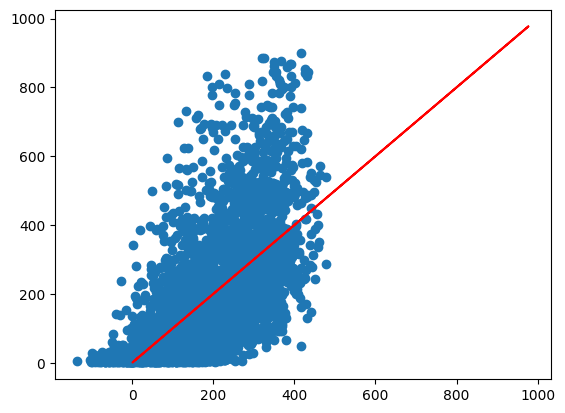

In [517]:
plt.scatter(ModeloBicis.predict(X_test),y_test)
plt.plot(y_train,y_train, '-r')

#### Conclusiones

1. El modelo se estima utilizando 6 variables de las disponibles en el Dataframe original
2. Se observó que algunas variables poseen relación, pero no lineal.
3. El modelo de regresión lineal parece no ser el ideal para este problema

#### Recomendaciones

1. Probar distintos tipos de regresión para el análisis de este dataset